<a href="https://colab.research.google.com/github/Susmitapaul45/VoiceRecognition/blob/main/audio_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv("/content/sample_data/audio_features - Copy.csv")

# Extract the "file_name" column for later
Level_column = dataset["file_name"]

# Apply StandardScaler to every numeric column (excluding "file_name")
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

# Define the privacy parameter epsilon with a fixed value
epsilon = 2  # Fixed value for epsilon

# Set a random seed for reproducibility
np.random.seed(42)

# Function to add Laplace noise to a column
def add_noise(column, epsilon):
    sensitivity = 1  # Assuming a sensitivity of 1 for simplicity
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale, len(column))
    return column + noise

# Apply differential privacy to each numeric column in the dataset (excluding "file_name")
for column in numeric_columns:
    dataset[column] = add_noise(dataset[column], epsilon)

# Restore the "file_name" column
dataset["file_name"] = Level_column

# Define the output file path
output_file_path = "audio_features-CopyDP-8.csv"

# Save the differentially private dataset to a new CSV file
dataset.to_csv(output_file_path, index=False)

print("Differentially private dataset saved to:", output_file_path)


Differentially private dataset saved to: audio_features-CopyDP-8.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read and prepare the data
df = pd.read_csv('/content/sample_data/audio_features - Copy.csv')
X = df.drop(['file_name'], axis=1)
y = df['file_name']

# Initialize metrics storage
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Initialize 5-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = clf.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"\nFold {fold} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

# Calculate and print average metrics
print("\nAverage Metrics across all folds:")
print(f"Accuracy: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")
print(f"Precision: {np.mean(precisions):.4f} (+/- {np.std(precisions):.4f})")
print(f"Recall: {np.mean(recalls):.4f} (+/- {np.std(recalls):.4f})")
print(f"F1-score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")


Fold 1 Results:
Accuracy: 0.8889
Precision: 0.9259
Recall: 0.8889
F1-score: 0.8815

Fold 2 Results:
Accuracy: 0.8889
Precision: 0.9259
Recall: 0.8889
F1-score: 0.8889

Fold 3 Results:
Accuracy: 0.7500
Precision: 0.7917
Recall: 0.7500
F1-score: 0.7417

Fold 4 Results:
Accuracy: 0.8750
Precision: 0.9167
Recall: 0.8750
F1-score: 0.8667

Fold 5 Results:
Accuracy: 0.7500
Precision: 0.7500
Recall: 0.7500
F1-score: 0.7500

Average Metrics across all folds:
Accuracy: 0.8306 (+/- 0.0660)
Precision: 0.8620 (+/- 0.0757)
Recall: 0.8306 (+/- 0.0660)
F1-score: 0.8257 (+/- 0.0657)


<ipython-input-1-f082ddb10d1b>:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary = pd.concat([summary, pd.DataFrame([{


Model Performance Summary:
              Model        Accuracy       Precision          Recall              F1  Std Dev
Logistic Regression 0.8750 ± 0.1118 0.8917 ± 0.1041 0.8750 ± 0.1118 0.8717 ± 0.1137 0.110354
      Random Forest 0.8306 ± 0.0660 0.8620 ± 0.0757 0.8306 ± 0.0660 0.8257 ± 0.0657 0.068331
                SVM 0.8278 ± 0.1015 0.8602 ± 0.0910 0.8278 ± 0.1015 0.8213 ± 0.1046 0.099675
      Decision Tree 0.8056 ± 0.1043 0.8435 ± 0.1014 0.8056 ± 0.1043 0.7984 ± 0.1053 0.103849
  Gradient Boosting 0.7833 ± 0.0957 0.8315 ± 0.0815 0.7833 ± 0.0957 0.7819 ± 0.0876 0.090114
                KNN 0.7778 ± 0.1478 0.8185 ± 0.1240 0.7778 ± 0.1478 0.7763 ± 0.1468 0.141588

Statistical Significance Testing (p-values compared to best model):
Random Forest: 0.5041
Gradient Boosting: 0.2462
SVM: 0.5327
KNN: 0.3344
Decision Tree: 0.3724


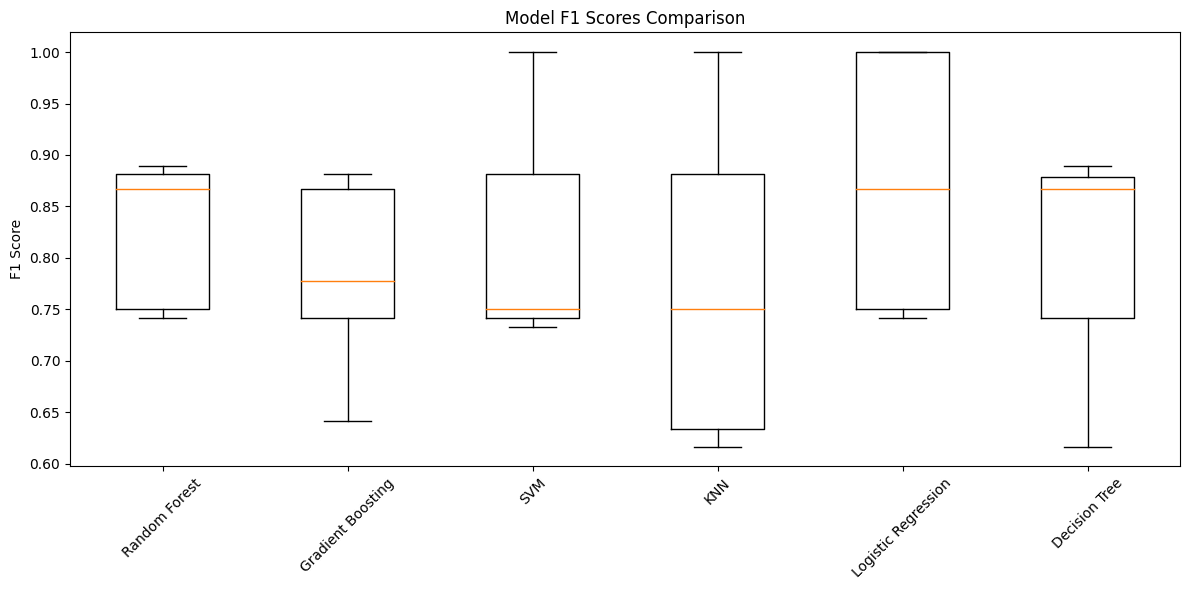

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from scipy import stats

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Evaluate a model and return multiple metrics"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }

# Read and prepare the data
df = pd.read_csv('/content/sample_data/audio_features - Copy.csv')
X = df.drop(['file_name'], axis=1)
y = df['file_name']

# Initialize models to test
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Initialize storage for results
results = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
          for name in models.keys()}

# Perform cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Split and scale data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluate each model
    for name, model in models.items():
        metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
        for metric, value in metrics.items():
            results[name][metric].append(value)

# Calculate mean and std for each metric
summary = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'Std Dev'])

for name in models.keys():
    summary = pd.concat([summary, pd.DataFrame([{
        'Model': name,
        'Accuracy': f"{np.mean(results[name]['accuracy']):.4f} ± {np.std(results[name]['accuracy']):.4f}",
        'Precision': f"{np.mean(results[name]['precision']):.4f} ± {np.std(results[name]['precision']):.4f}",
        'Recall': f"{np.mean(results[name]['recall']):.4f} ± {np.std(results[name]['recall']):.4f}",
        'F1': f"{np.mean(results[name]['f1']):.4f} ± {np.std(results[name]['f1']):.4f}",
        'Std Dev': np.mean([np.std(results[name][metric]) for metric in ['accuracy', 'precision', 'recall', 'f1']])
    }])], ignore_index=True)

# Sort by F1 score (extracting mean F1 from string)
summary['F1_sort'] = summary['F1'].apply(lambda x: float(x.split(' ')[0]))
summary = summary.sort_values('F1_sort', ascending=False).drop('F1_sort', axis=1)

# Statistical significance testing
best_model = summary.iloc[0]['Model']
best_f1_scores = results[best_model]['f1']

# Perform t-tests
p_values = {}
for name in models.keys():
    if name != best_model:
        t_stat, p_val = stats.ttest_ind(best_f1_scores, results[name]['f1'])
        p_values[name] = p_val

print("Model Performance Summary:")
print(summary.to_string(index=False))
print("\nStatistical Significance Testing (p-values compared to best model):")
for model, p_val in p_values.items():
    print(f"{model}: {p_val:.4f}")

# Visualize results
plt.figure(figsize=(12, 6))
data = [results[model]['f1'] for model in models.keys()]
plt.boxplot(data, labels=models.keys())
plt.title('Model F1 Scores Comparison')
plt.xticks(rotation=45)
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read and prepare the data
df = pd.read_csv('/content/sample_data/audio_features - Copy.csv')
X = df.drop(['file_name'], axis=1)
y = df['file_name']

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Initialize metrics storage
results = {
    'Model': [],
    'Fold': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Initialize 5-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross validation for each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}")

    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        # Split the data
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train and predict
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        results['Model'].append(model_name)
        results['Fold'].append(fold)
        results['Accuracy'].append(accuracy_score(y_test, y_pred))
        results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
        results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
        results['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Calculate mean metrics for each model
mean_results = results_df.groupby('Model').mean()
#std_results = results_df.groupby('Model').std()

print("\nMean Results:")
print(mean_results.round(4))
#print("\nStandard Deviations:")
#rint(std_results.round(4))

# Create voting classifier with best performing models
# (We'll determine the best models based on mean accuracy)
top_3_models = mean_results['Accuracy'].nlargest(3).index

voting_models = []
for model_name in top_3_models:
    if model_name == 'SVM':
        voting_models.append((model_name, SVC(probability=True, random_state=42)))
    elif model_name == 'Random Forest':
        voting_models.append((model_name, RandomForestClassifier(random_state=42)))
    elif model_name == 'Gradient Boosting':
        voting_models.append((model_name, GradientBoostingClassifier(random_state=42)))
    elif model_name == 'Decision Tree':
        voting_models.append((model_name, DecisionTreeClassifier(random_state=42)))
    elif model_name == 'KNN':
        voting_models.append((model_name, KNeighborsClassifier()))

# Create and evaluate voting classifier
voting_clf = VotingClassifier(estimators=voting_models, voting='soft')

# Initialize metrics storage for voting classifier
voting_results = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Evaluate voting classifier
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    voting_clf.fit(X_train_scaled, y_train)
    y_pred = voting_clf.predict(X_test_scaled)

    voting_results['Accuracy'].append(accuracy_score(y_test, y_pred))
    voting_results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    voting_results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    voting_results['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Print voting classifier results
print("\nVoting Classifier Results (using top 3 models):")
for metric, values in voting_results.items():
    print(f"{metric}: {np.mean(values):.4f} (+/- {np.std(values):.4f})")



# Return best individual model and whether voting classifier improved results
best_model = mean_results['Accuracy'].idxmax()
best_model_accuracy = mean_results['Accuracy'].max()
voting_accuracy = np.mean(voting_results['Accuracy'])

print("\nBest Model Selection:")
print(f"Best Individual Model: {best_model}")
print(f"Best Individual Model Accuracy: {best_model_accuracy:.4f}")
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")
#print(f"Improvement using Voting: {(voting_accuracy - best_model_accuracy):.4f}")

# Save final model if voting classifier is better
if voting_accuracy > best_model_accuracy:
    final_model = voting_clf
    print("Final Recommendation: Use Voting Classifier")
else:
    final_model = models[best_model]
    print(f"Final Recommendation: Use {best_model}")


Evaluating Decision Tree

Evaluating Random Forest

Evaluating SVM

Evaluating KNN

Evaluating Gradient Boosting

Mean Results:
                   Fold  Accuracy  Precision  Recall  F1-Score
Model                                                         
Decision Tree       3.0    0.8056     0.8435  0.8056    0.7984
Gradient Boosting   3.0    0.7833     0.8315  0.7833    0.7819
KNN                 3.0    0.7778     0.8185  0.7778    0.7763
Random Forest       3.0    0.8306     0.8620  0.8306    0.8257
SVM                 3.0    0.8278     0.8602  0.8278    0.8213

Voting Classifier Results (using top 3 models):
Accuracy: 0.8056 (+/- 0.1043)
Precision: 0.8454 (+/- 0.1028)
Recall: 0.8056 (+/- 0.1043)
F1-Score: 0.7991 (+/- 0.1058)

Best Model Selection:
Best Individual Model: Random Forest
Best Individual Model Accuracy: 0.8306
Voting Classifier Accuracy: 0.8056
Final Recommendation: Use Random Forest


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Read and prepare the data
df = pd.read_csv('/content/sample_data/audio_features - Copy.csv')
X = df.drop(['file_name'], axis=1)
y = df['file_name']

# Initialize models with optimized hyperparameters
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42),
    'SVM': SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
}

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Initialize results storage
results = {model_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
          for model_name in models.keys()}

# Perform 5-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"\nFold {fold}")
    print("-" * 50)

    # Split and scale data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluate each model
    for model_name, model in models.items():
        accuracy, precision, recall, f1 = evaluate_model(
            model, X_train_scaled, X_test_scaled, y_train, y_test
        )

        results[model_name]['accuracy'].append(accuracy)
        results[model_name]['precision'].append(precision)
        results[model_name]['recall'].append(recall)
        results[model_name]['f1'].append(f1)

        print(f"\n{model_name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")

# Print average results
print("\nAverage Results Across All Folds:")
print("-" * 50)
for model_name in models.keys():
    print(f"\n{model_name}:")
    print(f"Accuracy: {np.mean(results[model_name]['accuracy']):.4f} (+/- {np.std(results[model_name]['accuracy']):.4f})")
    print(f"Precision: {np.mean(results[model_name]['precision']):.4f} (+/- {np.std(results[model_name]['precision']):.4f})")
    print(f"Recall: {np.mean(results[model_name]['recall']):.4f} (+/- {np.std(results[model_name]['recall']):.4f})")
    print(f"F1-score: {np.mean(results[model_name]['f1']):.4f} (+/- {np.std(results[model_name]['f1']):.4f})")

# Create and evaluate Voting Classifier
print("\nTraining Voting Classifier...")
print("-" * 50)

# Initialize voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)),
    ('svm', SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42))
], voting='soft')

# Evaluate voting classifier
voting_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Split and scale data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluate voting classifier
    accuracy, precision, recall, f1 = evaluate_model(
        voting_clf, X_train_scaled, X_test_scaled, y_train, y_test
    )

    voting_results['accuracy'].append(accuracy)
    voting_results['precision'].append(precision)
    voting_results['recall'].append(recall)
    voting_results['f1'].append(f1)

# Print voting classifier results
print("\nVoting Classifier Results:")
print(f"Accuracy: {np.mean(voting_results['accuracy']):.4f} (+/- {np.std(voting_results['accuracy']):.4f})")
print(f"Precision: {np.mean(voting_results['precision']):.4f} (+/- {np.std(voting_results['precision']):.4f})")
print(f"Recall: {np.mean(voting_results['recall']):.4f} (+/- {np.std(voting_results['recall']):.4f})")
print(f"F1-score: {np.mean(voting_results['f1']):.4f} (+/- {np.std(voting_results['f1']):.4f})")


Fold 1
--------------------------------------------------

Decision Tree:
Accuracy: 0.7778
Precision: 0.6667
Recall: 0.7778
F1-score: 0.7037

Random Forest:
Accuracy: 0.8889
Precision: 0.9259
Recall: 0.8889
F1-score: 0.8815

SVM:
Accuracy: 0.8889
Precision: 0.9259
Recall: 0.8889
F1-score: 0.8815

KNN:
Accuracy: 0.8889
Precision: 0.9167
Recall: 0.8889
F1-score: 0.8783

Gradient Boosting:
Accuracy: 0.8889
Precision: 0.9259
Recall: 0.8889
F1-score: 0.8815

Fold 2
--------------------------------------------------

Decision Tree:
Accuracy: 0.8889
Precision: 0.9259
Recall: 0.8889
F1-score: 0.8889

Random Forest:
Accuracy: 0.8889
Precision: 0.9259
Recall: 0.8889
F1-score: 0.8889

SVM:
Accuracy: 0.8889
Precision: 0.9259
Recall: 0.8889
F1-score: 0.8815

KNN:
Accuracy: 0.7778
Precision: 0.7778
Recall: 0.7778
F1-score: 0.7778

Gradient Boosting:
Accuracy: 0.8889
Precision: 0.9259
Recall: 0.8889
F1-score: 0.8889

Fold 3
--------------------------------------------------

Decision Tree:
Accuracy:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Read and prepare the data
df = pd.read_csv('/content/sample_data/audio_features - Copy.csv')
X = df.drop(['file_name'], axis=1)
y = df['file_name']

# Initial train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models with optimized hyperparameters
models = {
    'Decision Tree': DecisionTreeClassifier(
        max_depth=8,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    ),
    'SVM': SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        class_weight='balanced',
        probability=True,
        random_state=42
    ),
    'KNN': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        metric='euclidean'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy, precision, recall, f1

# Initialize results storage for cross-validation
cv_results = {model_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
             for model_name in models.keys()}

# Perform 5-fold cross validation on training data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Performing 5-fold Cross-validation on Training Data...")
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train), 1):
    print(f"\nFold {fold}")
    print("-" * 50)

    # Split training data into training and validation
    X_train_fold = X_train_scaled[train_idx]
    X_val_fold = X_train_scaled[val_idx]
    y_train_fold = y_train.iloc[train_idx]
    y_val_fold = y_train.iloc[val_idx]

    # Evaluate each model
    for model_name, model in models.items():
        model_clone = model.__class__(**model.get_params())
        accuracy, precision, recall, f1 = evaluate_model(
            model_clone, X_train_fold, X_val_fold, y_train_fold, y_val_fold, model_name
        )

        cv_results[model_name]['accuracy'].append(accuracy)
        cv_results[model_name]['precision'].append(precision)
        cv_results[model_name]['recall'].append(recall)
        cv_results[model_name]['f1'].append(f1)

# Print average cross-validation results
print("\nAverage Cross-validation Results:")
print("-" * 50)
best_accuracy = 0
best_model_name = ""

for model_name in models.keys():
    avg_accuracy = np.mean(cv_results[model_name]['accuracy'])
    avg_precision = np.mean(cv_results[model_name]['precision'])
    avg_recall = np.mean(cv_results[model_name]['recall'])
    avg_f1 = np.mean(cv_results[model_name]['f1'])

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_model_name = model_name

    print(f"\n{model_name}:")
    print(f"Accuracy: {avg_accuracy:.4f} (+/- {np.std(cv_results[model_name]['accuracy']):.4f})")
    print(f"Precision: {avg_precision:.4f} (+/- {np.std(cv_results[model_name]['precision']):.4f})")
    print(f"Recall: {avg_recall:.4f} (+/- {np.std(cv_results[model_name]['recall']):.4f})")
    print(f"F1-score: {avg_f1:.4f} (+/- {np.std(cv_results[model_name]['f1']):.4f})")

print(f"\nBest performing model in cross-validation: {best_model_name}")

# Create and evaluate Voting Classifier on test set
print("\nTraining Voting Classifier...")
print("-" * 50)

voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5,
                                 class_weight='balanced', random_state=42)),
    ('svm', SVC(kernel='rbf', C=10, gamma='scale', probability=True,
                class_weight='balanced', random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,
                                     max_depth=5, random_state=42))
], voting='soft')

# Final evaluation on test set
print("\nFinal Evaluation on Test Set:")
print("-" * 50)

# Evaluate best individual model
best_model = models[best_model_name]
print(f"\nBest Individual Model ({best_model_name}):")
evaluate_model(best_model, X_train_scaled, X_test_scaled, y_train, y_test, best_model_name)

# Evaluate voting classifier
print("\nVoting Classifier:")
evaluate_model(voting_clf, X_train_scaled, X_test_scaled, y_train, y_test, "Voting Classifier")

# Feature importance for Random Forest (one of the best performing models)
if isinstance(best_model, (RandomForestClassifier, GradientBoostingClassifier)):
    print("\nFeature Importance:")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    print(feature_importance)

Performing 5-fold Cross-validation on Training Data...

Fold 1
--------------------------------------------------

Decision Tree Results:
Accuracy: 0.7143
Precision: 0.7143
Recall: 0.7143
F1-score: 0.6667

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         2

    accuracy                           0.71         7
   macro avg       0.62      0.62      0.58         7
weighted avg       0.71      0.71      0.67         7


Random Forest Results:
Accuracy: 0.5714
Precision: 0.7143
Recall: 0.5714
F1-score: 0.5714

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import os

# Load the dataset
file_path = "/content/sample_data/audio_features - Copy.csv"
dataset = pd.read_csv(file_path)

# Extract features and target variable
X = dataset.drop(columns=["file_name"])  # Replace 'file_name' with the actual target column name if different
y = dataset["file_name"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),  # probability=True for voting
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Perform 5-fold cross-validation and choose the best model based on mean accuracy
best_model = None
best_score = 0
cv_scores = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_scores[model_name] = scores.mean()
    print(f"{model_name} - CV Mean Accuracy: {scores.mean():.4f}")

    # Update best model if this model's accuracy is better
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_model = model_name

print("\nBest Model from Cross-Validation:", best_model, "with accuracy:", best_score)

# Fit each model on training data and evaluate on test data
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Test Accuracy: {accuracy:.4f}")

# Voting Ensemble with the top 3 performing models from cross-validation
top_models = sorted(cv_scores, key=cv_scores.get, reverse=True)[:3]
ensemble = VotingClassifier(
    estimators=[(name, models[name]) for name in top_models],
    voting='soft'
)
ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("\nVoting Ensemble Test Accuracy:", ensemble_accuracy)

# Determine the best-performing model
final_model = ensemble if ensemble_accuracy >= best_score else models[best_model]
print("\nBest Model:", "Voting Ensemble" if final_model == ensemble else best_model)
print("Final Model Test Accuracy:", max(ensemble_accuracy, best_score))


Decision Tree - CV Mean Accuracy: 0.7952
Random Forest - CV Mean Accuracy: 0.8238
SVM - CV Mean Accuracy: 0.3048
KNN - CV Mean Accuracy: 0.6619
Gradient Boosting - CV Mean Accuracy: 0.7905

Best Model from Cross-Validation: Random Forest with accuracy: 0.8238095238095238
Decision Tree - Test Accuracy: 0.8889
Random Forest - Test Accuracy: 1.0000
SVM - Test Accuracy: 0.1111
KNN - Test Accuracy: 0.8889
Gradient Boosting - Test Accuracy: 1.0000

Voting Ensemble Test Accuracy: 1.0

Best Model: Voting Ensemble
Final Model Test Accuracy: 1.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = "/content/sample_data/audio_features - Copy.csv"
dataset = pd.read_csv(file_path)

# Extract features and target variable
X = dataset.drop(columns=["file_name"])  # Replace 'file_name' with the actual target column name if different
y = dataset["file_name"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for each model
param_grids = {
    "Decision Tree": {
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'clf__n_estimators': [50, 100, 150],
        'clf__max_depth': [None, 10, 20, 30]
    },
    "SVM": {
        'clf__C': [0.1, 1, 10],
        'clf__gamma': ['scale', 'auto']
    },
    "KNN": {
        'clf__n_neighbors': [3, 5, 7],
        'clf__weights': ['uniform', 'distance']
    },
    "Gradient Boosting": {
        'clf__n_estimators': [50, 100, 150],
        'clf__learning_rate': [0.01, 0.1, 0.2]
    }
}

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),  # probability=True for voting
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Standardize data and apply hyperparameter tuning
best_model = None
best_score = 0
cv_scores = {}
for model_name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    grid_search = GridSearchCV(pipe, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    cv_score = grid_search.best_score_
    cv_scores[model_name] = cv_score
    print(f"{model_name} - Best CV Mean Accuracy: {cv_score:.4f}")

    # Update best model if this model's accuracy is better
    if cv_score > best_score:
        best_score = cv_score
        best_model = grid_search.best_estimator_

print("\nBest Model from Cross-Validation:", best_model, "with accuracy:", best_score)

# Evaluate each model on the test set
for model_name, model in models.items():
    best_estimator = GridSearchCV(Pipeline([('scaler', StandardScaler()), ('clf', model)]), param_grids[model_name], cv=5).fit(X_train, y_train).best_estimator_
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Test Accuracy: {accuracy:.4f}")

# Voting Ensemble with the top 3 performing models from cross-validation
top_models = sorted(cv_scores, key=cv_scores.get, reverse=True)[:3]
ensemble_estimators = [(name, GridSearchCV(Pipeline([('scaler', StandardScaler()), ('clf', models[name])]), param_grids[name], cv=5).fit(X_train, y_train).best_estimator_) for name in top_models]

ensemble = VotingClassifier(
    estimators=ensemble_estimators,
    voting='soft'
)
ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("\nVoting Ensemble Test Accuracy:", ensemble_accuracy)

# Determine the best-performing model
final_model = ensemble if ensemble_accuracy >= best_score else best_model
print("\nBest Model:", "Voting Ensemble" if final_model == ensemble else best_model)
print("Final Model Test Accuracy:", max(ensemble_accuracy, best_score))


Decision Tree - Best CV Mean Accuracy: 0.8524
Random Forest - Best CV Mean Accuracy: 0.8238
SVM - Best CV Mean Accuracy: 0.7619
KNN - Best CV Mean Accuracy: 0.7571
Gradient Boosting - Best CV Mean Accuracy: 0.7905

Best Model from Cross-Validation: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(max_depth=10, min_samples_split=10))]) with accuracy: 0.8523809523809524
Decision Tree - Test Accuracy: 0.8889
Random Forest - Test Accuracy: 1.0000
SVM - Test Accuracy: 0.8889
KNN - Test Accuracy: 0.8889
Gradient Boosting - Test Accuracy: 1.0000

Voting Ensemble Test Accuracy: 1.0

Best Model: Voting Ensemble
Final Model Test Accuracy: 1.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load and prepare the dataset
dataset = pd.read_csv('/content/sample_data/audio_features - Copy.csv')
X = dataset.drop(columns=["file_name"])
y = dataset["file_name"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define optimized models
models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=8,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        probability=True,
        class_weight='balanced',
        random_state=42
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        metric='euclidean'
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}

# Function to evaluate and print metrics
def print_metrics(y_true, y_pred, model_name=""):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred))

    return accuracy, precision, recall, f1

# Perform 5-fold cross-validation with multiple metrics
print("Performing 5-fold Cross-validation:")
print("-" * 50)

cv_results = {}
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

for model_name, model in models.items():
    scores = cross_validate(model, X_train_scaled, y_train,
                          cv=5, scoring=scoring, return_train_score=False)

    cv_results[model_name] = {
        'accuracy': scores['test_accuracy'].mean(),
        'precision': scores['test_precision_weighted'].mean(),
        'recall': scores['test_recall_weighted'].mean(),
        'f1': scores['test_f1_weighted'].mean(),
        'std_accuracy': scores['test_accuracy'].std()
    }

    print(f"\n{model_name} - Cross-validation Results:")
    print(f"Accuracy: {scores['test_accuracy'].mean():.4f} (+/- {scores['test_accuracy'].std():.4f})")
    print(f"Precision: {scores['test_precision_weighted'].mean():.4f}")
    print(f"Recall: {scores['test_recall_weighted'].mean():.4f}")
    print(f"F1-score: {scores['test_f1_weighted'].mean():.4f}")

# Find best model from cross-validation
best_model = max(cv_results.items(), key=lambda x: x[1]['accuracy'])
print(f"\nBest Model from Cross-validation: {best_model[0]}")
print(f"CV Accuracy: {best_model[1]['accuracy']:.4f}")

# Train and evaluate individual models on test set
print("\nEvaluating Models on Test Set:")
print("-" * 50)

test_results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    test_results[model_name] = print_metrics(y_test, y_pred, model_name)

# Select top 3 models for voting ensemble
top_models = sorted(cv_results.items(), key=lambda x: x[1]['accuracy'], reverse=True)[:3]
top_model_names = [model[0] for model in top_models]

print("\nTop 3 Models selected for Voting Ensemble:")
for model_name in top_model_names:
    print(f"{model_name}: CV Accuracy = {cv_results[model_name]['accuracy']:.4f}")

# Create and evaluate voting ensemble
voting_clf = VotingClassifier(
    estimators=[(name, models[name]) for name in top_model_names],
    voting='soft'
)

print("\nTraining and Evaluating Voting Ensemble:")
print("-" * 50)

voting_clf.fit(X_train_scaled, y_train)
ensemble_pred = voting_clf.predict(X_test_scaled)
ensemble_metrics = print_metrics(y_test, ensemble_pred, "Voting Ensemble")

# Determine final best model
final_ensemble_accuracy = ensemble_metrics[0]
final_best_model_accuracy = max(test_results.items(), key=lambda x: x[1][0])[1][0]

if final_ensemble_accuracy > final_best_model_accuracy:
    print("\nFinal Best Model: Voting Ensemble")
    print(f"Final Accuracy: {final_ensemble_accuracy:.4f}")
else:
    best_individual = max(test_results.items(), key=lambda x: x[1][0])[0]
    print(f"\nFinal Best Model: {best_individual}")
    print(f"Final Accuracy: {final_best_model_accuracy:.4f}")

# Feature importance for best model (if applicable)
best_model_instance = models[best_model[0]]
if hasattr(best_model_instance, 'feature_importances_'):
    print("\nFeature Importance for Best Model:")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model_instance.feature_importances_
    }).sort_values('importance', ascending=False)
    print(feature_importance)

Performing 5-fold Cross-validation:
--------------------------------------------------

Decision Tree - Cross-validation Results:
Accuracy: 0.6714 (+/- 0.1611)
Precision: 0.6476
Recall: 0.6714
F1-score: 0.6375

Random Forest - Cross-validation Results:
Accuracy: 0.6714 (+/- 0.1333)
Precision: 0.6516
Recall: 0.6714
F1-score: 0.6271

SVM - Cross-validation Results:
Accuracy: 0.7286 (+/- 0.1061)
Precision: 0.7244
Recall: 0.7286
F1-score: 0.6841

KNN - Cross-validation Results:
Accuracy: 0.7905 (+/- 0.1424)
Precision: 0.7832
Recall: 0.7905
F1-score: 0.7552

Gradient Boosting - Cross-validation Results:
Accuracy: 0.7048 (+/- 0.1480)
Precision: 0.6794
Recall: 0.7048
F1-score: 0.6616

Best Model from Cross-validation: KNN
CV Accuracy: 0.7905

Evaluating Models on Test Set:
--------------------------------------------------

Decision Tree Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Detailed Classification Report:
              precision    recall  f1-score   su

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
file_path = "/content/sample_data/audio_features - Copy.csv"
dataset = pd.read_csv(file_path)

# Extract features and target variable
X = dataset.drop(columns=["file_name"])  # Update target column name if different
y = dataset["file_name"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models with parameter grids for hyperparameter tuning
param_grids = {
    "Decision Tree": (DecisionTreeClassifier(), {"max_depth": [5, 10, 15, None]}),
    "Random Forest": (RandomForestClassifier(), {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}),
    "SVM": (SVC(probability=True), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}),
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}),
    "Gradient Boosting": (GradientBoostingClassifier(), {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]})
}

# Perform 5-fold cross-validation with hyperparameter tuning
best_models = {}
cv_scores = {}

for model_name, (model, params) in param_grids.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    cv_scores[model_name] = grid_search.best_score_
    print(f"{model_name} - Best CV Mean Accuracy: {grid_search.best_score_:.4f}")

# Voting Ensemble with the top 3 performing models
top_models = sorted(cv_scores, key=cv_scores.get, reverse=True)[:3]
ensemble = VotingClassifier(
    estimators=[(name, best_models[name]) for name in top_models],
    voting='soft'
)
ensemble.fit(X_train, y_train)

# Evaluate all models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"\n{model_name} - Test Accuracy: {accuracy:.4f}")
    print(f"{model_name} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))

# Evaluate the ensemble model on the test set
ensemble_pred = ensemble.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred, average="weighted")
ensemble_recall = recall_score(y_test, ensemble_pred, average="weighted")
ensemble_f1 = f1_score(y_test, ensemble_pred, average="weighted")

print("\nVoting Ensemble - Test Accuracy:", ensemble_accuracy)
print("Voting Ensemble - Precision:", ensemble_precision)
print("Voting Ensemble - Recall:", ensemble_recall)
print("Voting Ensemble - F1 Score:", ensemble_f1)
print(classification_report(y_test, ensemble_pred))

# Determine the best-performing model
final_model = ensemble if ensemble_accuracy >= max(cv_scores.values()) else best_models[max(cv_scores, key=cv_scores.get)]
print("\nBest Model:", "Voting Ensemble" if final_model == ensemble else max(cv_scores, key=cv_scores.get))
print("Final Model Test Accuracy:", max(ensemble_accuracy, max(cv_scores.values())))


Decision Tree - Best CV Mean Accuracy: 0.8238
Random Forest - Best CV Mean Accuracy: 0.8238
SVM - Best CV Mean Accuracy: 0.7905
KNN - Best CV Mean Accuracy: 0.7571
Gradient Boosting - Best CV Mean Accuracy: 0.7905

Decision Tree - Test Accuracy: 0.8889
Decision Tree - Precision: 0.9111, Recall: 0.8889, F1 Score: 0.8765
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.50      0.67         2
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         1

    accuracy                           0.89         9
   macro avg       0.95      0.88      0.89         9
weighted avg       0.91      0.89      0.88         9


Random Forest - Test Accuracy: 1.0000
Random Forest - Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00     

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load and prepare the dataset
dataset = pd.read_csv('/content/sample_data/audio_features - Copy.csv')
X = dataset.drop(columns=["file_name"])
y = dataset["file_name"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define optimized models
models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=8,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        probability=True,
        class_weight='balanced',
        random_state=42
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        metric='euclidean'
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}

# Function to evaluate and print metrics
def print_metrics(y_true, y_pred, model_name=""):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred))

    return accuracy, precision, recall, f1

# Perform 5-fold cross-validation with multiple metrics
print("Performing 5-fold Cross-validation:")
print("-" * 50)

cv_results = {}
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

for model_name, model in models.items():
    scores = cross_validate(model, X_train_scaled, y_train,
                          cv=5, scoring=scoring, return_train_score=False)

    cv_results[model_name] = {
        'accuracy': scores['test_accuracy'].mean(),
        'precision': scores['test_precision_weighted'].mean(),
        'recall': scores['test_recall_weighted'].mean(),
        'f1': scores['test_f1_weighted'].mean(),
        'std_accuracy': scores['test_accuracy'].std()
    }

    print(f"\n{model_name} - Cross-validation Results:")
    print(f"Accuracy: {scores['test_accuracy'].mean():.4f} (+/- {scores['test_accuracy'].std():.4f})")
    print(f"Precision: {scores['test_precision_weighted'].mean():.4f}")
    print(f"Recall: {scores['test_recall_weighted'].mean():.4f}")
    print(f"F1-score: {scores['test_f1_weighted'].mean():.4f}")

# Find best model from cross-validation
best_model = max(cv_results.items(), key=lambda x: x[1]['accuracy'])
print(f"\nBest Model from Cross-validation: {best_model[0]}")
print(f"CV Accuracy: {best_model[1]['accuracy']:.4f}")

# Train and evaluate individual models on test set
print("\nEvaluating Models on Test Set:")
print("-" * 50)

test_results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    test_results[model_name] = print_metrics(y_test, y_pred, model_name)

# Select top 3 models for voting ensemble
top_models = sorted(cv_results.items(), key=lambda x: x[1]['accuracy'], reverse=True)[:3]
top_model_names = [model[0] for model in top_models]

print("\nTop 3 Models selected for Voting Ensemble:")
for model_name in top_model_names:
    print(f"{model_name}: CV Accuracy = {cv_results[model_name]['accuracy']:.4f}")

# Create and evaluate voting ensemble
voting_clf = VotingClassifier(
    estimators=[(name, models[name]) for name in top_model_names],
    voting='soft'
)

print("\nTraining and Evaluating Voting Ensemble:")
print("-" * 50)

voting_clf.fit(X_train_scaled, y_train)
ensemble_pred = voting_clf.predict(X_test_scaled)
ensemble_metrics = print_metrics(y_test, ensemble_pred, "Voting Ensemble")

# Perform 5-fold cross-validation on the voting ensemble
print("\nPerforming 5-fold Cross-validation on Voting Ensemble:")
print("-" * 50)

voting_cv_scores = cross_validate(voting_clf, X_train_scaled, y_train,
                                 cv=5, scoring=scoring, return_train_score=False)

voting_cv_results = {
    'accuracy': voting_cv_scores['test_accuracy'].mean(),
    'precision': voting_cv_scores['test_precision_weighted'].mean(),
    'recall': voting_cv_scores['test_recall_weighted'].mean(),
    'f1': voting_cv_scores['test_f1_weighted'].mean(),
    'std_accuracy': voting_cv_scores['test_accuracy'].std()
}

print("\nVoting Ensemble Cross-validation Results:")
print(f"Accuracy: {voting_cv_results['accuracy']:.4f} (+/- {voting_cv_results['std_accuracy']:.4f})")
print(f"Precision: {voting_cv_results['precision']:.4f}")
print(f"Recall: {voting_cv_results['recall']:.4f}")
print(f"F1-score: {voting_cv_results['f1']:.4f}")

# Determine final best model
final_ensemble_accuracy = voting_cv_results['accuracy']
final_best_model_accuracy = max(test_results.items(), key=lambda x: x[1][0])[1][0]

if final_ensemble_accuracy > final_best_model_accuracy:
    print("\nFinal Best Model: Voting Ensemble")
    print(f"Final Accuracy: {final_ensemble_accuracy:.4f}")
else:
    best_individual = max(test_results.items(), key=lambda x: x[1][0])[0]
    print(f"\nFinal Best Model: {best_individual}")
    print(f"Final Accuracy: {final_best_model_accuracy:.4f}")

# Feature importance for best model (if applicable)
best_model_instance = models[best_model[0]]
if hasattr(best_model_instance, 'feature_importances_'):
    print("\nFeature Importance for Best Model:")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model_instance.feature_importances_
    }).sort_values('importance', ascending=False)
    print(feature_importance)

Performing 5-fold Cross-validation:
--------------------------------------------------

Decision Tree - Cross-validation Results:
Accuracy: 0.6714 (+/- 0.1611)
Precision: 0.6476
Recall: 0.6714
F1-score: 0.6375

Random Forest - Cross-validation Results:
Accuracy: 0.6714 (+/- 0.1333)
Precision: 0.6516
Recall: 0.6714
F1-score: 0.6271

SVM - Cross-validation Results:
Accuracy: 0.7286 (+/- 0.1061)
Precision: 0.7244
Recall: 0.7286
F1-score: 0.6841

KNN - Cross-validation Results:
Accuracy: 0.7905 (+/- 0.1424)
Precision: 0.7832
Recall: 0.7905
F1-score: 0.7552

Gradient Boosting - Cross-validation Results:
Accuracy: 0.7048 (+/- 0.1480)
Precision: 0.6794
Recall: 0.7048
F1-score: 0.6616

Best Model from Cross-validation: KNN
CV Accuracy: 0.7905

Evaluating Models on Test Set:
--------------------------------------------------

Decision Tree Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Detailed Classification Report:
              precision    recall  f1-score   su

In [ ]:
!pip install pydub simpleaudio

from pydub import AudioSegment
import numpy as np
import simpleaudio as sa

# Step 1: Load the audio file
audio = AudioSegment.from_file("/content/sample_data/3.mp3")  # Replace with your audio file path
samples = np.array(audio.get_array_of_samples())

# Step 2: Add Laplacian noise
epsilon = 0.0001
scale = 1 / epsilon  # Scale parameter for Laplacian distribution
laplacian_noise = np.random.laplace(0, scale, samples.shape)

# Add noise and ensure the audio stays within the correct range
if audio.sample_width == 1:  # 8-bit audio
    samples = np.clip(samples + laplacian_noise, -128, 127).astype(np.int8)
elif audio.sample_width == 2:  # 16-bit audio
    samples = np.clip(samples + laplacian_noise, -32768, 32767).astype(np.int16)
else:
    raise ValueError("Unsupported audio sample width")

# Step 3: Create a new AudioSegment with the noisy samples
noisy_audio = AudioSegment(
    samples.tobytes(),
    frame_rate=audio.frame_rate,
    sample_width=audio.sample_width,
    channels=audio.channels
)

# Save the modified audio
noisy_audio.export("noisy_audio.wav", format="wav")

# Step 4: Play the modified audio
wave_obj = sa.WaveObject.from_wave_file("noisy_audio.wav")
play_obj = wave_obj.play()
play_obj.wait_done()

SimpleaudioError: Error opening PCM device. -- CODE: -2 -- MSG: No such file or directory

In [ ]:
import os

def save_audio_to_folder(input_folder, output_folder):
    """
    Saves the output of processing multiple audio files to a specified folder.

    Parameters:
    input_folder (str): Path to the input folder where the processed files will be saved
    output_folder (str): Path to the output folder where the processed files will be saved
    """
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    for input_file in input_files:
        # Get the filename without the extension
        filename = os.path.splitext(os.path.basename(input_file))[0]

        # Construct the output file path
        output_file = os.path.join(output_folder, f"{filename}.wav")

        # Process the audio and save the output
        noisy_audio.export(output_file, format="wav")

        print(f"Saved processed audio to: {output_file}")

#Here's how you can use this function:

```python
input_files = ["audio_file1.wav", "audio_file2.wav", "audio_file3.wav"]
output_folder = "processed_audio"

save_audio_to_folder(input_files, output_folder)

ModuleNotFoundError: No module named 'pydub'

In [1]:
!pip install pydub simpleaudio
import os
from pydub import AudioSegment
import numpy as np

def save_audio_to_folder(input_folder, output_folder, epsilon=1):
    """
    Processes each audio file in the input folder by adding Laplacian noise
    and saves the modified files to the output folder.

    Parameters:
    input_folder (str): Path to the input folder containing audio files.
    output_folder (str): Path to the output folder where processed files will be saved.
    epsilon (float): Epsilon value for the Laplacian noise scale.
    """
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Define the scale parameter for Laplacian noise
    scale = 1 / epsilon

    # Iterate through each file in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an audio file (mp3)
        if filename.endswith(".mp3"):
            # Load the audio file
            input_file = os.path.join(input_folder, filename)
            audio = AudioSegment.from_file(input_file)
            samples = np.array(audio.get_array_of_samples())

            # Generate and add Laplacian noise
            laplacian_noise = np.random.laplace(0, scale, samples.shape)
            if audio.sample_width == 1:  # 8-bit audio
                noisy_samples = np.clip(samples + laplacian_noise, -128, 127).astype(np.int8)
            elif audio.sample_width == 2:  # 16-bit audio
                noisy_samples = np.clip(samples + laplacian_noise, -32768, 32767).astype(np.int16)
            else:
                raise ValueError("Unsupported audio sample width")

            # Create a new AudioSegment with noisy samples
            noisy_audio = AudioSegment(
                noisy_samples.tobytes(),
                frame_rate=audio.frame_rate,
                sample_width=audio.sample_width,
                channels=audio.channels
            )

            # Construct the output file path and save the processed audio
            output_file = os.path.join(output_folder, f"noisy_{filename}")
            noisy_audio.export(output_file, format="wav")
            print(f"Saved processed audio to: {output_file}")

# Usage
input_folder = "/content/sample_data/Audio_signal_input_1"  # Path to the folder containing input audio files
output_folder = "/content/sample_data/Audio_signal_ouput_1"  # Path to the folder for saving output audio files

save_audio_to_folder(input_folder, output_folder)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp310-cp310-linux_x86_64.whl size=2054402 sha256=bc7584474422f9498f620344e40d4254dca06d6f78c4245858b8cf1b837a2388
  Stored in directory: /root/.cache/pip/wheels/10/70/ed/8c41675109565c2c65c3ac40d20859fc9d3f93a8efbb11d1c7
Successfully built simpleaudio
Saved processed audio to: /content/sample_data/Audio_signal_ouput_1/noisy_19.mp3
Saved processed audio to: /content/sample_data/Audio_signal_ouput_1/noisy_35.mp3
Saved processed audio to: /content/sample_data/Audio_signal_ouput_1/noisy_23.mp3
Saved processed audio to: /content/sample_data/Audio_signal_ouput_1/noisy_37.mp3
Saved processed audio to: /content/sample_data/Audio_signal_ouput_1/noisy_16.mp3
Saved processed audio to: /content/sample_data/Audio_signal_ouput_1/noisy_31.mp3
Saved processed audio to: /content/sample_data/Audio_signal_ouput_1/noisy_40.mp3
S

In [9]:
import pandas as pd
import numpy as np
import os

def create_test_files(input_file, num_files, samples_per_file):
    """
    Create test files from audio features data

    Parameters:
    input_file (str): Path to input CSV file
    num_files (int): Number of test files to create
    samples_per_file (int): Number of samples in each test file
    """
    # Read the CSV file
    try:
        df = pd.read_csv(input_file)
        print(f"Successfully read {input_file}")
    except FileNotFoundError:
        print(f"Error: File {input_file} not found")
        return

    # Create output directory in Colab
    output_dir = '/content/test_files'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")

    # Get unique classes
    classes = df['file_name'].unique()
    samples_per_class = samples_per_file // len(classes)

    print(f"\nCreating {num_files} test files with {samples_per_file} samples each")
    print(f"Samples per class: {samples_per_class}")

    # Create test files
    for i in range(num_files):
        test_data = []

        # Select samples from each class
        for class_label in classes:
            class_data = df[df['file_name'] == class_label]

            # Make sure we don't try to select more samples than available
            available_samples = len(class_data)
            samples_to_select = min(samples_per_class, available_samples)

            selected_samples = class_data.sample(
                n=samples_to_select,
                random_state=i*100 + class_label
            )
            test_data.append(selected_samples)

        # Combine and shuffle the data
        test_file = pd.concat(test_data, ignore_index=True)
        test_file = test_file.sample(frac=1, random_state=i).reset_index(drop=True)

        # Save to CSV
        output_file = os.path.join(output_dir, f'test_set_{i+1}.csv')
        test_file.to_csv(output_file, index=False)

        print(f'\nCreated test file {i+1}:')
        print(f'- Filename: test_set_{i+1}.csv')
        print(f'- Total samples: {len(test_file)}')
        print('- Class distribution:', test_file['file_name'].value_counts().to_dict())

# Define the correct file path for Colab
input_file = "/content/sample_data/audio_features - Copy.csv"  # Correct path with spaces
num_files = 12
samples_per_file = 4

# Call the function with all required parameters
create_test_files(
    input_file=input_file,
    num_files=num_files,
    samples_per_file=samples_per_file
)

# Print summary of original data
df = pd.read_csv("/content/sample_data/audio_features - Copy.csv")  # Correct path
print("\nOriginal data summary:")
print("Total samples:", len(df))
print("Samples per class:\n", df['file_name'].value_counts())

Successfully read /content/sample_data/audio_features - Copy.csv
Created directory: /content/test_files

Creating 12 test files with 4 samples each
Samples per class: 1

Created test file 1:
- Filename: test_set_1.csv
- Total samples: 4
- Class distribution: {2: 1, 3: 1, 1: 1, 0: 1}

Created test file 2:
- Filename: test_set_2.csv
- Total samples: 4
- Class distribution: {3: 1, 2: 1, 0: 1, 1: 1}

Created test file 3:
- Filename: test_set_3.csv
- Total samples: 4
- Class distribution: {2: 1, 3: 1, 1: 1, 0: 1}

Created test file 4:
- Filename: test_set_4.csv
- Total samples: 4
- Class distribution: {3: 1, 1: 1, 0: 1, 2: 1}

Created test file 5:
- Filename: test_set_5.csv
- Total samples: 4
- Class distribution: {0: 1, 1: 1, 3: 1, 2: 1}

Created test file 6:
- Filename: test_set_6.csv
- Total samples: 4
- Class distribution: {0: 1, 1: 1, 2: 1, 3: 1}

Created test file 7:
- Filename: test_set_7.csv
- Total samples: 4
- Class distribution: {0: 1, 3: 1, 1: 1, 2: 1}

Created test file 8:
- Fi

In [10]:
import pandas as pd
import numpy as np
import os

def create_training_files(input_file, num_files, samples_per_file):
    """
    Create training files from audio features data

    Parameters:
    input_file (str): Path to input CSV file
    num_files (int): Number of training files to create
    samples_per_file (int): Number of samples in each training file
    """
    # Read the CSV file
    try:
        df = pd.read_csv(input_file)
        print(f"Successfully read {input_file}")
    except FileNotFoundError:
        print(f"Error: File {input_file} not found")
        return

    # Create output directory in Colab
    output_dir = '/content/training_files'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")

    # Get unique classes
    classes = df['file_name'].unique()
    samples_per_class = samples_per_file // len(classes)

    print(f"\nCreating {num_files} training files with {samples_per_file} samples each")
    print(f"Samples per class: {samples_per_class}")

    # Create training files
    for i in range(num_files):
        training_data = []

        # Select samples from each class
        for class_label in classes:
            class_data = df[df['file_name'] == class_label]

            # Make sure we don't try to select more samples than available
            available_samples = len(class_data)
            samples_to_select = min(samples_per_class, available_samples)

            # Use different random_state for each file to ensure different samples
            selected_samples = class_data.sample(
                n=samples_to_select,
                random_state=i*100 + hash(str(class_label)) % 10000  # More robust random state
            )
            training_data.append(selected_samples)

        # Combine and shuffle the data
        training_file = pd.concat(training_data, ignore_index=True)
        training_file = training_file.sample(frac=1, random_state=i).reset_index(drop=True)

        # Save to CSV
        output_file = os.path.join(output_dir, f'training_set_{i+1}.csv')
        training_file.to_csv(output_file, index=False)

        print(f'\nCreated training file {i+1}:')
        print(f'- Filename: training_set_{i+1}.csv')
        print(f'- Total samples: {len(training_file)}')
        print('- Class distribution:', training_file['file_name'].value_counts().to_dict())

# Define parameters
input_file = "/content/sample_data/audio_features - Copy.csv"
num_files = 28
samples_per_file = 100  # Increased from 8 to 100 for better training data size

# Call the function
create_training_files(
    input_file=input_file,
    num_files=num_files,
    samples_per_file=samples_per_file
)

# Print summary of original data
df = pd.read_csv(input_file)
print("\nOriginal data summary:")
print("Total samples:", len(df))
print("Samples per class:")
class_distribution = df['file_name'].value_counts()
print(class_distribution)

# Print usage statistics
print("\nTraining data creation summary:")
print(f"Total training files created: {num_files}")
print(f"Samples per file: {samples_per_file}")
print(f"Total training samples: {num_files * samples_per_file}")
print(f"Samples per class per file: {samples_per_file // len(class_distribution)}")

Successfully read /content/sample_data/audio_features - Copy.csv
Created directory: /content/training_files

Creating 28 training files with 100 samples each
Samples per class: 25

Created training file 1:
- Filename: training_set_1.csv
- Total samples: 42
- Class distribution: {2: 11, 3: 11, 0: 10, 1: 10}

Created training file 2:
- Filename: training_set_2.csv
- Total samples: 42
- Class distribution: {2: 11, 3: 11, 0: 10, 1: 10}

Created training file 3:
- Filename: training_set_3.csv
- Total samples: 42
- Class distribution: {2: 11, 3: 11, 0: 10, 1: 10}

Created training file 4:
- Filename: training_set_4.csv
- Total samples: 42
- Class distribution: {2: 11, 3: 11, 0: 10, 1: 10}

Created training file 5:
- Filename: training_set_5.csv
- Total samples: 42
- Class distribution: {3: 11, 2: 11, 0: 10, 1: 10}

Created training file 6:
- Filename: training_set_6.csv
- Total samples: 42
- Class distribution: {2: 11, 3: 11, 0: 10, 1: 10}

Created training file 7:
- Filename: training_set_7

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the data
def prepare_data(file_path):
    # Read the CSV file
    df = pd.read_csv('/content/sample_data/train_copy.csv')

    # Separate features and target
    # Assuming all columns except 'file_name' are features
    X = df.drop('file_name', axis=1)
    y = df['file_name']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        'SVM': SVC(kernel='rbf', random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Naive Bayes': GaussianNB()
    }

    # Dictionary to store results
    results = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': []
    }

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store results
        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)

        print(f"{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")

    return pd.DataFrame(results)

def plot_results(results_df):
    # Set figure size
    plt.figure(figsize=(15, 8))

    # Create grouped bar chart
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    x = np.arange(len(results_df['Model']))
    width = 0.2

    for i, metric in enumerate(metrics):
        plt.bar(x + i*width, results_df[metric], width, label=metric)

    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(x + width*1.5, results_df['Model'], rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    # Save the plot
    plt.savefig('model_comparison.png')
    plt.close()

# Main execution
def main():
    # File path
    file_path = "/content/sample_data/audio_features - Copy.csv"

    print("Loading and preparing data...")
    X_train, X_test, y_train, y_test = prepare_data(file_path)

    print("\nTraining and evaluating models...")
    results_df = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    print("\nResults Summary:")
    print(results_df.to_string(index=False))

    print("\nCreating visualization...")
    plot_results(results_df)
    print("Results have been plotted and saved as 'model_comparison.png'")

    # Save results to CSV
    results_df.to_csv('model_results.csv', index=False)
    print("Results have been saved to 'model_results.csv'")

if __name__ == "__main__":
    main()

Loading and preparing data...


EmptyDataError: No columns to parse from file